In [10]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [12]:
def returnDataset(filename):
    X = pd.read_csv('X_data_sample_trips.csv', skipinitialspace=True)
    y = pd.read_csv('y_data_sample_trips.csv', skipinitialspace=True)
    y = y.values.ravel()

    display(X.head())
    display(X.shape)
    display(y[:5])
    display(y.shape)

    return X, y

In [13]:
X, y = returnDataset('sampledata.csv')

,rideable_type,member_casual,day_of_week,month,season,trip_duration_mins,hour,day_of_month
0,0,1,2,11,3,25,17,21
1,1,0,0,9,3,135,9,3
2,1,0,4,7,2,13,9,20
3,1,0,2,7,2,6,11,11
4,0,0,0,9,3,55,10,3


(197794, 8)

array([1, 1, 6, 7, 2])

(197794,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [15]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [16]:
# hyperparameter tune
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [19]:
best_params = grid_search.best_params_
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Lowest RMSE found:  2.9310262009346792


In [20]:
best_xgb_model = xgb.XGBRegressor(**best_params)

best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred = best_xgb_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 8.578052864258783
Root Mean Squared Error: 2.9288313137254565
Mean Absolute Error: 1.836801452460235
R-squared: 0.8483685141323041


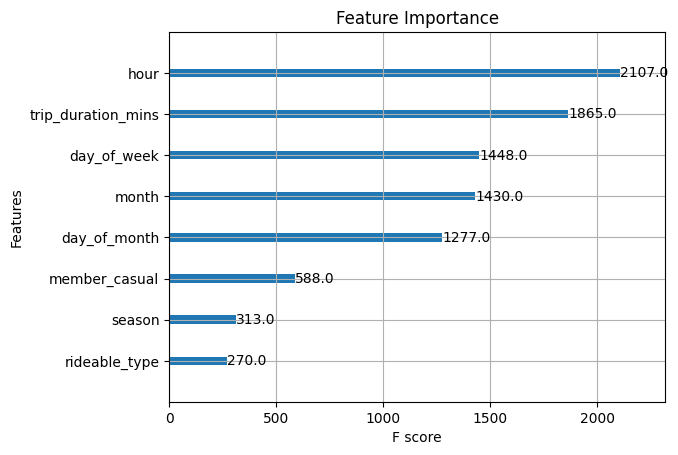

In [24]:
import matplotlib.pyplot as plt

xgb.plot_importance(best_xgb_model)
plt.title('Feature Importance')
plt.show()